In [36]:
import osmnx as ox  
ox.__version__

'0.9'

In [37]:
place = 'Berkeley, California, USA'

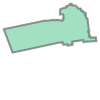

In [38]:
gdf = ox.gdf_from_place(place)
gdf.loc[0, 'geometry']

In [39]:
G = ox.graph_from_place(place, network_type='drive')
G_projected = ox.project_graph(G)

In [40]:
# save street network as GraphML file
ox.save_graphml(G_projected, filename='network.graphml')

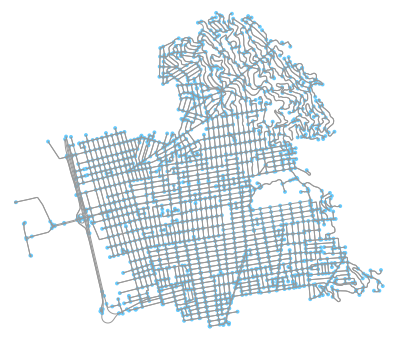

In [41]:
G2 = ox.load_graphml('network.graphml')
fig, ax = ox.plot_graph(G2)

In [42]:
#building footprints within the city limits of Berkeley, California
gdf2 = ox.footprints.footprints_from_place(place)
gdf_proj = ox.project_gdf(gdf2)
areas = gdf_proj.area #area in projected meters of each building footprint

In [43]:
areas.head()

18934     5892.274728
18935     3615.990703
58261      917.344508
94099     8825.412703
300569    1714.238842
dtype: float64

In [44]:
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', save=True, show=False, close=True, filename='berkeley_bldgs', dpi=40)

In [45]:
# from IPython.display import Image
# img_folder = "images"
# Image('{}/{}.{}'.format(img_folder, 'berkeley_bldgs', extension), height=size, width=size)

In [46]:
#Starting Point as input (x, y, distx, disty)
x = (37.79 + 37.78)/2
y = (-122.41 + -122.43)/2
distx = (37.79 - x)
disty = (-122.41 - y)
print(distx)
print(disty)

0.005
0.01


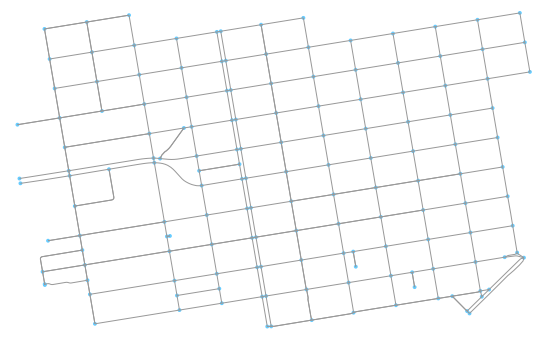

(<Figure size 687.674x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a3411ce50>)

In [47]:
#street network from bounding box
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)


In [48]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240

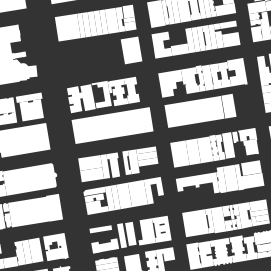

In [49]:
#building polygons in bounding box
point = (x, y)
dist= 200
gdf3 = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf3)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='bldgs', dpi=90)
Image('{}/{}.{}'.format(img_folder, 'bldgs', extension), height=size, width=size)

In [50]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, point, network_type='drive', bldg_color='orange', dpi=40,
              dist=805, default_width=4, street_widths=None):
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.footprints.plot_footprints(gdf, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

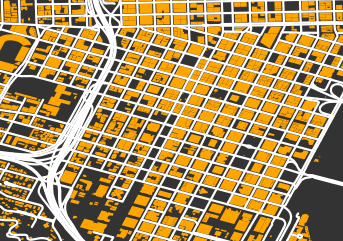

In [51]:
place = 'portland_buildings'
point = (45.517309, -122.682138)
make_plot(place, point)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [52]:
gdf #just location polygon


,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-122.234196,37.90669,37.835727,-122.368679,"POLYGON ((-122.3686793 37.8695716, -122.366186...","Berkeley, Alameda County, California, USA"


In [53]:
gdf2 #building footprints from place

,access,addr:city,addr:country,addr:housename,addr:housenumber,addr:postcode,addr:state,addr:street,addr:unit,aed,...,type,url,visibility,voltage,website,wheelchair,wheelchair:description,wifi,wikidata,wikipedia
18934,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q5318294,NaN
18935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94099,NaN,NaN,NaN,Valley Life Sciences Building,NaN,NaN,CA,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945393,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q14682479,en:International House Berkeley
1734951,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,multipolygon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
gdf3 #building footprints from bbox

,addr:city,addr:country,addr:housename,addr:housenumber,addr:postcode,addr:state,addr:street,alt_name,amenity,baby_hatch,...,phone,shop,social_facility,social_facility:for,source,tourism,type,verified,website,wikidata
3463281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN
3490798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,NaN,NaN
34285845,NaN,NaN,NaN,895,NaN,NaN,Geary Street,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,survey,hotel,NaN,NaN,NaN,NaN
34286044,San Francisco,NaN,NaN,1015,94109,CA,Geary St,NaN,NaN,NaN,...,+1 415 673 5232,NaN,NaN,NaN,NaN,hotel,NaN,NaN,http://www.themonarchhotel.com,NaN
36810595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36810688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71209404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72027748,NaN,NaN,NaN,1000,NaN,NaN,Van Ness Avenue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148428437,NaN,NaN,NaN,1200,NaN,NaN,Van Ness Avenue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Bing,NaN,NaN,NaN,NaN,NaN
171178116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Bing,NaN,NaN,NaN,NaN,NaN


In [55]:
# save as a shapefile
gdf_save = gdf2.drop(labels='nodes', axis=1)
gdf_save.to_file('data/berkeley_bldgs')


/Users/gillian/anaconda2/lib/python2.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [72]:
gdf3.geometry

3463281      (POLYGON ((-122.4212039 37.7837081, -122.42113...
3490798      (POLYGON ((-122.4194776 37.7839276, -122.41941...
34285845     POLYGON ((-122.417968 37.7860272, -122.4178983...
34286044     POLYGON ((-122.4201948 37.7857481, -122.419993...
36810595     POLYGON ((-122.4194587 37.7850924, -122.419519...
36810688     POLYGON ((-122.4183154 37.7852352, -122.418378...
71209404     POLYGON ((-122.4192352 37.7839639, -122.418851...
72027748     POLYGON ((-122.4197664 37.7853704, -122.419704...
148428437    POLYGON ((-122.4213949 37.7867421, -122.420579...
171178116    POLYGON ((-122.4174969 37.7860994, -122.417772...
172111599    POLYGON ((-122.4206483 37.783101, -122.4206692...
172111604    POLYGON ((-122.4206831 37.7832714, -122.420696...
172111607    POLYGON ((-122.4206692 37.7832031, -122.420683...
172111621    POLYGON ((-122.420212 37.7833918, -122.4199604...
194908392    POLYGON ((-122.4214276 37.7848157, -122.421498...
197465530    POLYGON ((-122.4221437 37.784111, -122.421

In [115]:
house_centroids = []
for x in gdf3.geometry:
    house_centroids.append(x.centroid)

In [116]:
house_centroids

POINT (-122.4195706853631 37.78374849515452)
MULTIPOLYGON (((-122.4194776 37.7839276, -122.4194135 37.7836011, -122.4196773 37.7835688, -122.4196903 37.783635, -122.4196661 37.783638, -122.419705 37.7838362, -122.4197292 37.7838332, -122.4197414 37.7838953, -122.4194776 37.7839276), (-122.4195958 37.7837102, -122.4195919 37.7836906, -122.4195101 37.7837006, -122.419514 37.7837203, -122.4195958 37.7837102), (-122.4196167 37.7838158, -122.4196129 37.7837962, -122.419527 37.7838067, -122.4195308 37.7838263, -122.4196167 37.7838158)))


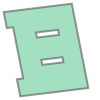

In [85]:
#building polygon
print(centroids[1])
print(gdf3.geometry.iloc[1])
gdf3.geometry.iloc[1]

In [88]:
#distance between 2 centroids
import numpy as np
dist = np.linalg.norm(centroids[0]-centroids[1])
print(dist)

128.11939607538642


# calculate how many roads i intersect with between two centroids

#street network from bounding box
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)`
ox.plot_graph(G_projected)

In [92]:
G_projected.edges #edges returned node, neighbor, key, data

OutMultiEdgeView([(65303552, 65303553, 0), (65303552, 65319956, 0), (65303553, 65303554, 0), (65303553, 65314166, 0), (65303554, 65319961, 0), (65303554, 65303556, 0), (65303556, 65319964, 0), (65303556, 258758548, 0), (65303556, 65314173, 0), (65303559, 65303560, 0), (65303559, 65314175, 0), (65303560, 65319968, 0), (65303560, 65303561, 0), (65303561, 65314183, 0), (65303561, 4014319583, 0), (65319946, 65303546, 0), (65319949, 65319946, 0), (65303566, 65314187, 0), (65303566, 65319027, 0), (65303566, 65292734, 0), (65303566, 4014319583, 0), (65319951, 65319949, 0), (65319951, 65303550, 0), (65350764, 65329111, 0), (65319956, 65319951, 0), (65319958, 65303553, 0), (65319958, 65319956, 0), (65319961, 65352457, 0), (65319961, 65319958, 0), (65373722, 258758552, 0), (65373722, 65350758, 0), (65373722, 65372918, 0), (65319964, 65327169, 0), (65319964, 65303556, 0), (65319964, 65319961, 0), (65319966, 258758547, 0), (65319966, 65303559, 0), (65319968, 65350764, 0), (65319968, 65319966, 0), 

In [96]:
#does the node refer to the coordinate? I think it's just the ID for the node
G_projected.graph #what the heck is 'streets_per_node'

{'crs': {'datum': 'WGS84',
  'ellps': 'WGS84',
  'proj': 'utm',
  'units': 'm',
  'zone': 10},
 'name': 'unnamed_UTM',
 'streets_per_node': {65285109: 3,
  65287111: 4,
  65287128: 4,
  65292717: 4,
  65292734: 3,
  65295347: 4,
  65295349: 4,
  65295352: 4,
  65303546: 4,
  65303548: 4,
  65303550: 4,
  65303552: 4,
  65303553: 4,
  65303554: 4,
  65303556: 4,
  65303559: 4,
  65303560: 4,
  65303561: 4,
  65303566: 4,
  65303689: 3,
  65308264: 4,
  65308268: 4,
  65308270: 3,
  65308272: 4,
  65308278: 4,
  65308283: 4,
  65308287: 4,
  65308289: 4,
  65314156: 4,
  65314158: 4,
  65314161: 4,
  65314163: 4,
  65314166: 4,
  65314171: 4,
  65314173: 4,
  65314175: 4,
  65314180: 4,
  65314183: 4,
  65314187: 4,
  65317951: 4,
  65317954: 4,
  65317956: 4,
  65317957: 4,
  65317959: 4,
  65319013: 3,
  65319019: 4,
  65319021: 3,
  65319023: 4,
  65319027: 4,
  65319030: 4,
  65319946: 4,
  65319949: 4,
  65319951: 4,
  65319956: 4,
  65319958: 4,
  65319961: 4,
  65319964: 4,
  6531

In [97]:
G.graph

{'crs': {'init': 'epsg:4326'},
 'name': 'unnamed',
 'simplified': True,
 'streets_per_node': {65285109: 3,
  65287111: 4,
  65287128: 4,
  65292717: 4,
  65292734: 3,
  65295347: 4,
  65295349: 4,
  65295352: 4,
  65303546: 4,
  65303548: 4,
  65303550: 4,
  65303552: 4,
  65303553: 4,
  65303554: 4,
  65303556: 4,
  65303559: 4,
  65303560: 4,
  65303561: 4,
  65303566: 4,
  65303689: 3,
  65308264: 4,
  65308268: 4,
  65308270: 3,
  65308272: 4,
  65308278: 4,
  65308283: 4,
  65308287: 4,
  65308289: 4,
  65314156: 4,
  65314158: 4,
  65314161: 4,
  65314163: 4,
  65314166: 4,
  65314171: 4,
  65314173: 4,
  65314175: 4,
  65314180: 4,
  65314183: 4,
  65314187: 4,
  65317951: 4,
  65317954: 4,
  65317956: 4,
  65317957: 4,
  65317959: 4,
  65319013: 3,
  65319019: 4,
  65319021: 3,
  65319023: 4,
  65319027: 4,
  65319030: 4,
  65319946: 4,
  65319949: 4,
  65319951: 4,
  65319956: 4,
  65319958: 4,
  65319961: 4,
  65319964: 4,
  65319966: 4,
  65319968: 4,
  65319971: 4,
  653199

In [103]:
G.nodes

NodeView((65327144, 65327150, 65327151, 65327154, 65327158, 65354421, 65327169, 65319013, 65319019, 65319021, 65319023, 65319027, 65319030, 65314161, 1580501206, 1580501216, 65362154, 65362158, 65358113, 65358118, 65317954, 65360270, 65360273, 65317957, 65317959, 65292717, 65292734, 65343960, 65333814, 65333819, 65333826, 65333834, 65333837, 65333839, 65333841, 65352321, 65352325, 65352330, 2351399563, 65352339, 65352344, 65354419, 1723738829, 65372918, 65343958, 65352457, 65352459, 2496389906, 65334120, 65334125, 65334128, 65334133, 65334137, 65334139, 65287111, 65287128, 65338334, 65338344, 65295347, 65285109, 65295352, 65303546, 65303548, 65303550, 65303552, 65303553, 65303554, 65303559, 65303560, 65303561, 65319946, 65319949, 65303566, 65319951, 65319956, 65319958, 65319961, 65319964, 65319966, 65319968, 65319971, 65319973, 4018809916, 65317951, 65317956, 4018809930, 65350752, 65350758, 65350760, 65350764, 65303689, 1127285904, 65369279, 4061806116, 4013421806, 295224575, 276546818

In [104]:
G.edges

OutMultiEdgeView([(65327144, 65352337, 0), (65327144, 65352339, 0), (65327144, 65308283, 0), (65327150, 65308283, 0), (65327150, 258758555, 0), (65327150, 65327151, 0), (65327151, 258758552, 0), (65327151, 65327154, 0), (65327151, 65354421, 0), (65327151, 65327150, 0), (65327154, 258758553, 0), (65327154, 65333834, 0), (65327154, 65317957, 0), (65327154, 65327151, 0), (65327158, 65314173, 0), (65327158, 65317957, 0), (65327158, 258758551, 0), (65354421, 65360273, 0), (65354421, 65333834, 0), (65354421, 65327151, 0), (65327169, 65319964, 0), (65327169, 258758546, 0), (65319013, 276546818, 0), (65319013, 65319019, 0), (65319013, 65292717, 0), (65319019, 65333841, 0), (65319019, 65329103, 0), (65319019, 65319013, 0), (65319019, 65319021, 0), (65319021, 65338344, 0), (65319021, 258759674, 0), (65319021, 65319019, 0), (65319023, 258759674, 0), (65319023, 65314187, 0), (65319023, 65338334, 0), (65319027, 65319030, 0), (65319027, 65319973, 0), (65319027, 65303566, 0), (65319030, 65295352, 0),

In [107]:
G.nodes[65327144]

{'osmid': 65327144, 'x': -122.4186146, 'y': 37.7802716}

In [113]:
road_segments = []
for v in G.nodes:
    road_segments.append(G.nodes[v])

In [114]:
road_segments #not all of them have highway

[{'osmid': 65327144, 'x': -122.4186146, 'y': 37.7802716},
 {'highway': u'traffic_signals',
  'osmid': 65327150,
  'x': -122.419005,
  'y': 37.7821738},
 {'highway': u'traffic_signals',
  'osmid': 65327151,
  'x': -122.4191918,
  'y': 37.7831061},
 {'highway': u'traffic_signals',
  'osmid': 65327154,
  'x': -122.4193813,
  'y': 37.7840364},
 {'highway': u'traffic_signals',
  'osmid': 65327158,
  'x': -122.4197566,
  'y': 37.7859027},
 {'osmid': 65354421, 'x': -122.417548, 'y': 37.7833151},
 {'highway': u'traffic_signals',
  'osmid': 65327169,
  'x': -122.4205089,
  'y': 37.7896296},
 {'osmid': 65319013, 'x': -122.4275074, 'y': 37.7825309},
 {'osmid': 65319019, 'x': -122.4276002, 'y': 37.7829914},
 {'osmid': 65319021, 'x': -122.4277887, 'y': 37.783926},
 {'highway': u'traffic_signals',
  'osmid': 65319023,
  'x': -122.4280145,
  'y': 37.7850444},
 {'highway': u'traffic_signals',
  'osmid': 65319027,
  'x': -122.4285434,
  'y': 37.7876523},
 {'highway': u'traffic_signals',
  'osmid': 6531

In [119]:
house_centroids